# Lecture 18 - Classification Using Scikit Learn



This note book cover the following Concepts
1. Visualization of Data
2. Preprocessing of Data
3. Model Fitting using Scikit Learn
4. Model Evaluation
5. Result Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category= FutureWarning)

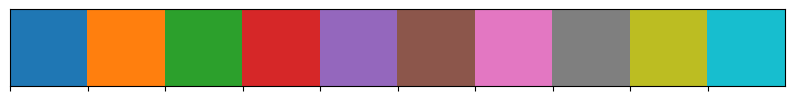

In [2]:
current_palette1 = sns.color_palette()
sns.palplot(current_palette1)
plt.show()

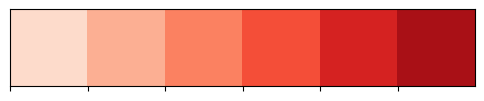

In [ ]:
current_palette2 = sns.color_palette()
sns.palplot( sns.color_palette ("Reds"))
plt.show()

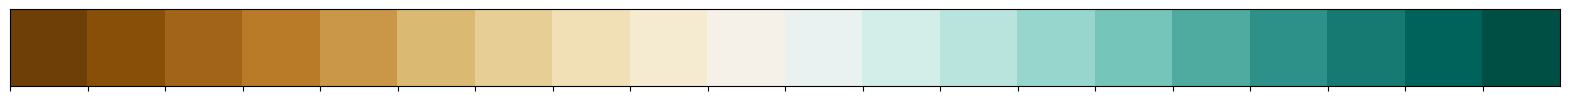

In [ ]:
current_palette3 = sns.color_palette()

sns.palplot(sns.color_palette("BrBG", 20))
plt.show()

Seaborn on Titanic dataset

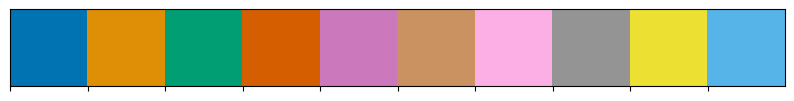

In [ ]:
current_palette2 = sns.color_palette()
sns.palplot(sns.color_palette("colorblind"))
plt.show()

Import the Data

In [3]:
full_data = pd.read_csv ('/content/titanic_dataset (1).csv')

In [4]:
full_data.shape

(891, 12)

In [5]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


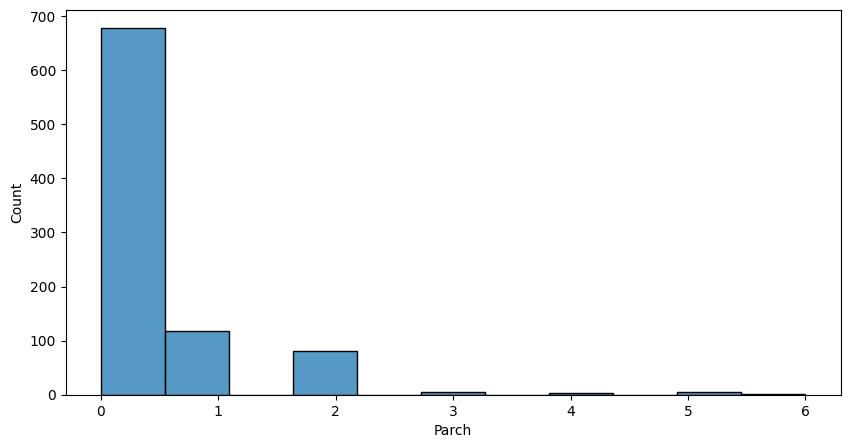

In [ ]:
sns.histplot(full_data['Parch'],kde=False)
plt.show()

Kdeplot

<Axes: xlabel='Age', ylabel='Density'>

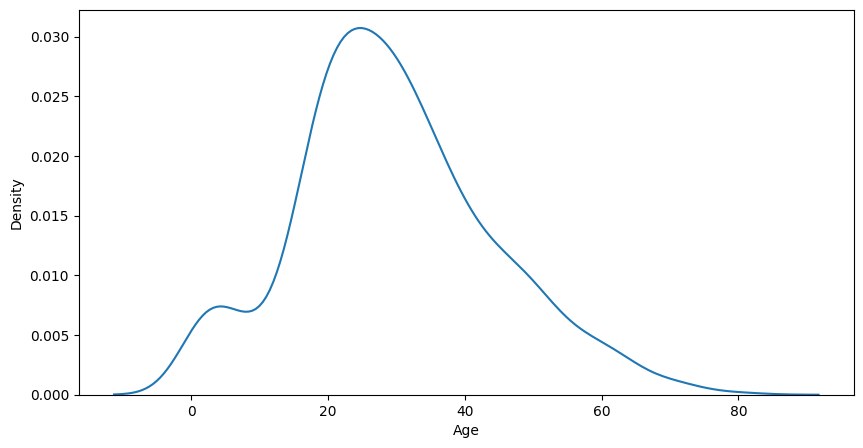

In [6]:
sns.distplot(full_data['Age'], hist=False)

As we can see that most of the passenger has the age between 20 to 40

<Figure size 800x800 with 0 Axes>

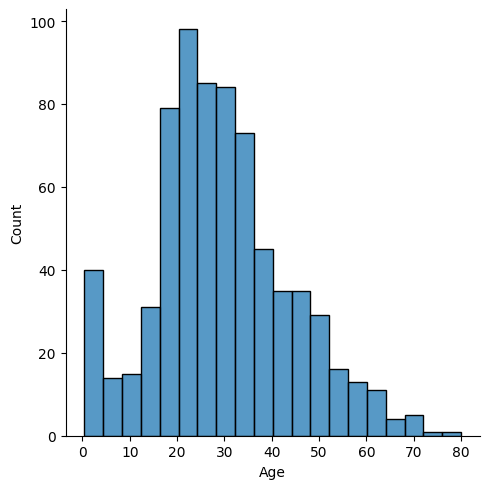

In [ ]:
plt.figure(figsize = (8,8))
sns.displot(full_data['Age'])
plt.show()

# Relational Plots

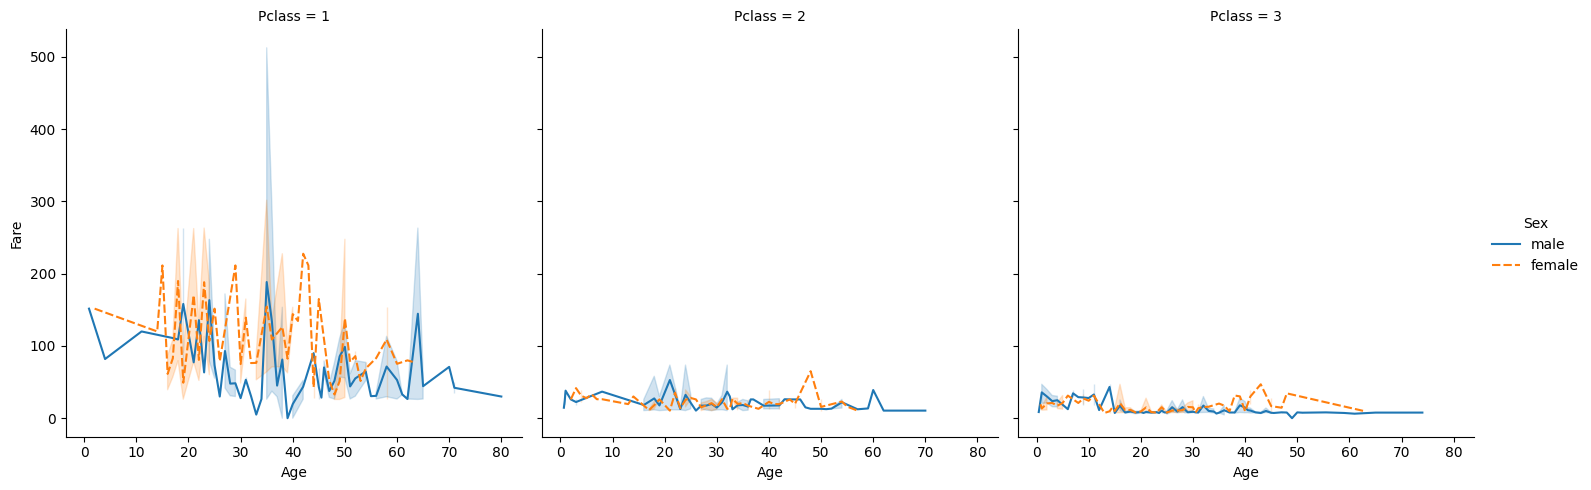

In [ ]:
sns.relplot(x="Age" , y="Fare", col="Pclass" , hue= "Sex" , style= "Sex", kind= "line", data=full_data)
plt.show()

Scatterplot

<Axes: xlabel='Age', ylabel='Fare'>

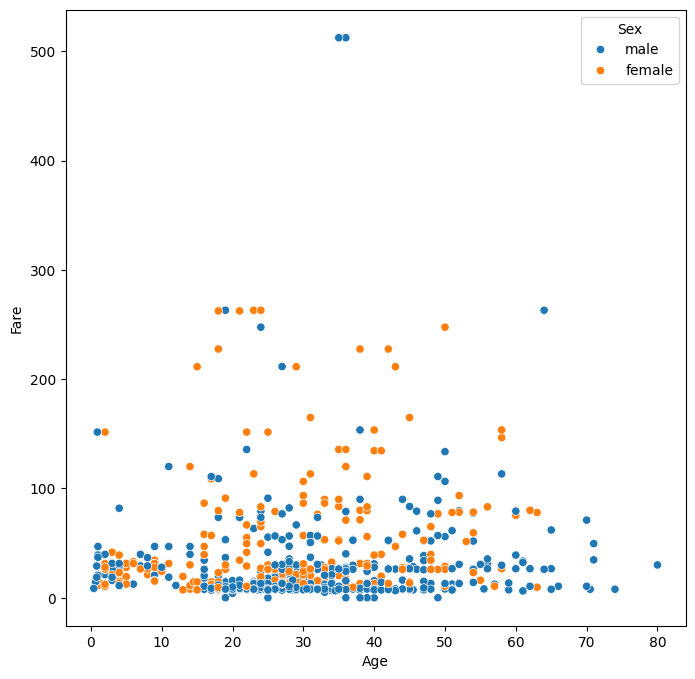

In [7]:
plt.figure(figsize = (8,8))
sns.scatterplot(x="Age", y="Fare" , hue = "Sex", data=full_data)

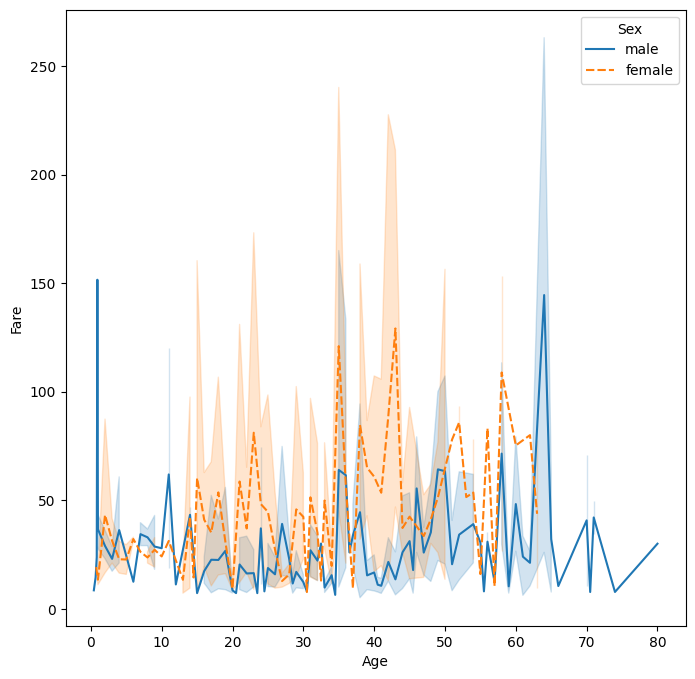

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age" , y="Fare" , hue="Sex" , style="Sex", data=full_data)
plt.show()

Categorical Plot

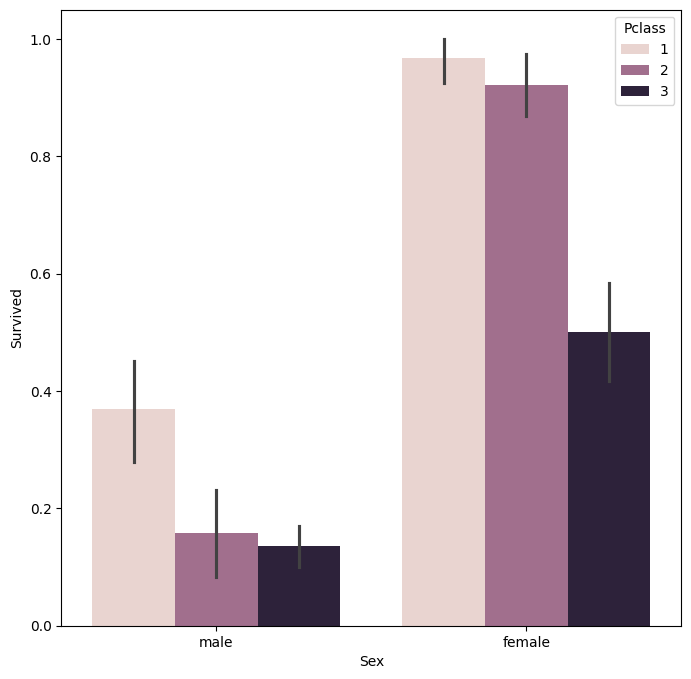

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex" , y= "Survived", hue="Pclass" , data=full_data)
plt.show()

Stripplot

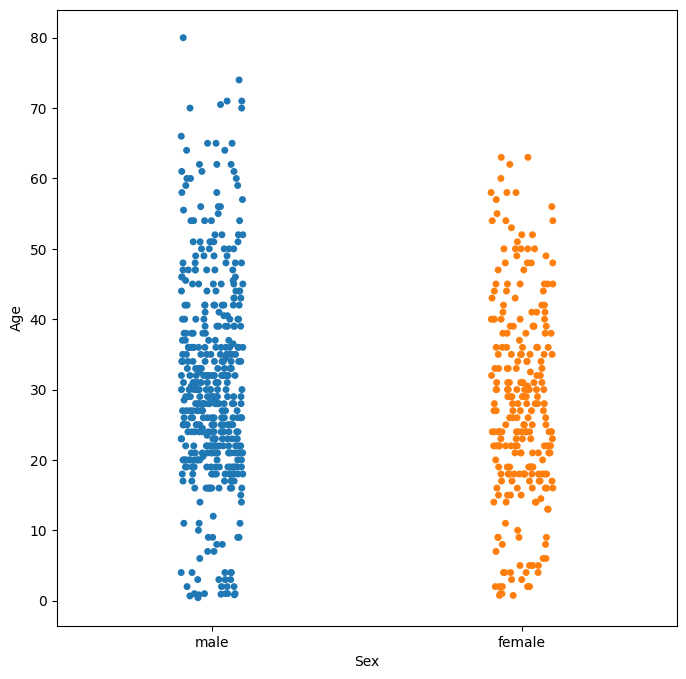

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex", y="Age" , hue="Sex", data=full_data)
plt.show()

ViolinPlot

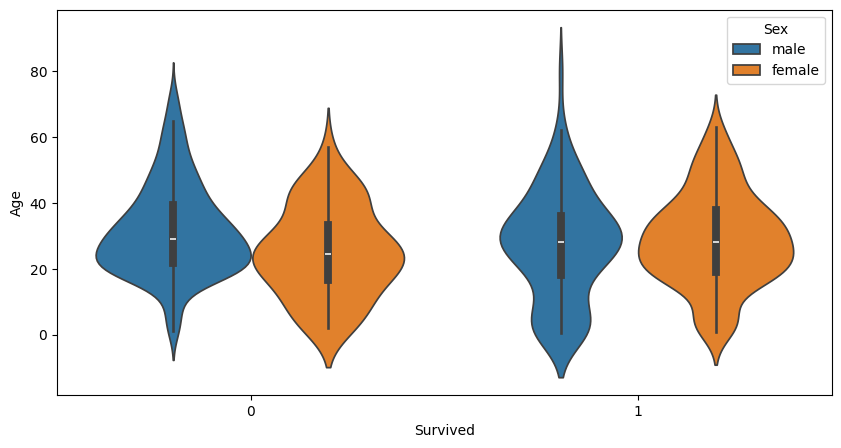

In [8]:
sns.violinplot(x="Survived", y="Age" ,hue="Sex",data=full_data)
plt.show()

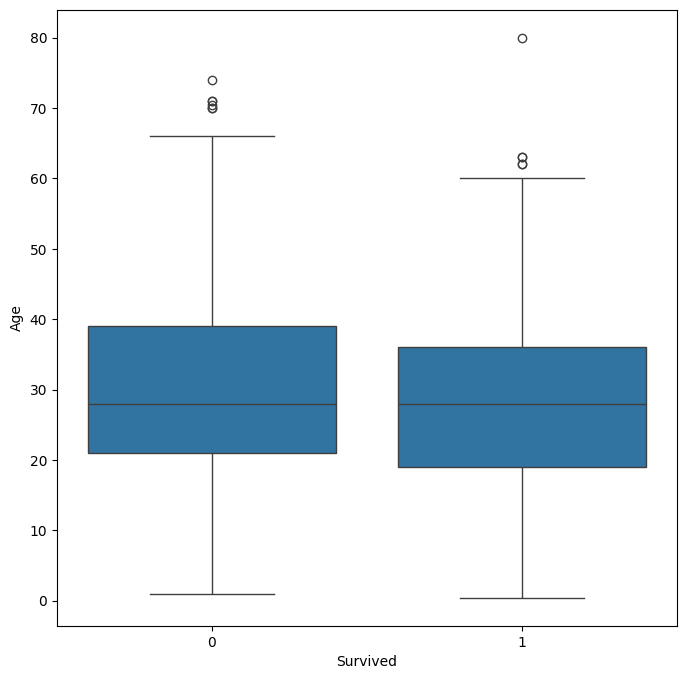

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived" , y="Age", data=full_data)
plt.show()

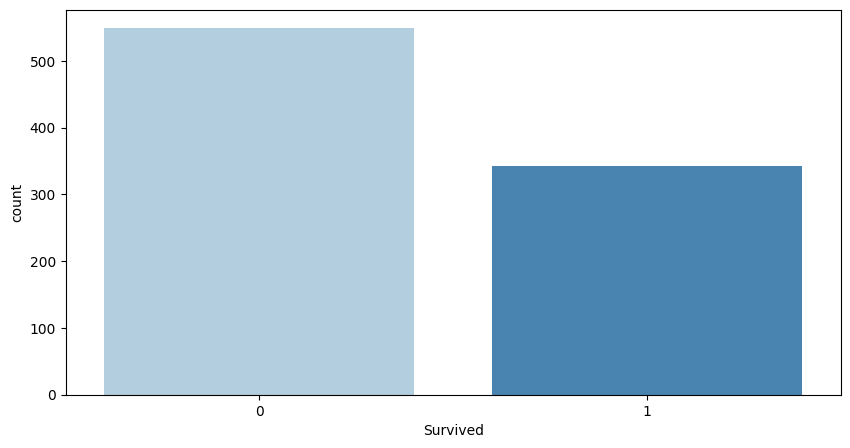

In [ ]:
sns.countplot(x="Survived" , data=full_data, palette="Blues")
plt.show()

Data Shape

In [ ]:
# Data Shape
print('train data:',full_data.shape)

train data: (891, 12)


In [ ]:
# View first few rows
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Data

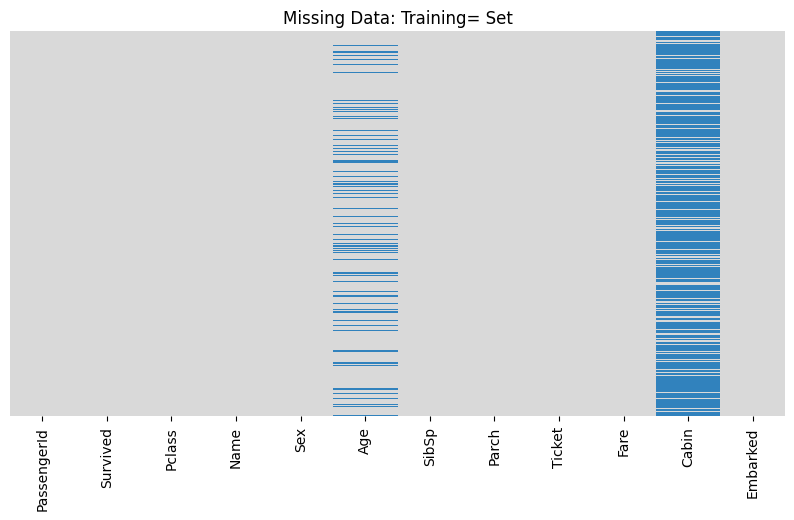

In [10]:
sns.heatmap(full_data.isnull(),yticklabels= False , cbar= False, cmap = 'tab20c_r')
plt.title('Missing Data: Training= Set')
plt.show()

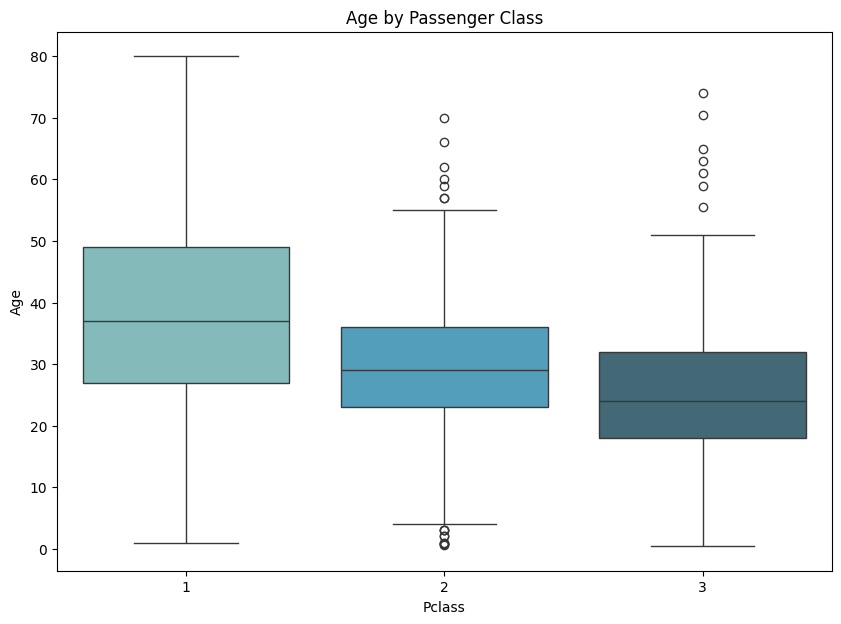

In [11]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = full_data , palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the Wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.

In [12]:
# Imputation function
def impute_age(cols):
  Age  = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
      return Age

# Apple the function to the Age Columnl
full_data['Age'] = full_data[['Age','Pclass']].apply(impute_age, axis =1)

In [13]:
# Remove Cabin feature
full_data.drop('Cabin' , axis = 1, inplace= True)

In [14]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [15]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
# Remove unnecessary columns
full_data.drop(['Name','Ticket'], axis = 1, inplace= True)

# Convert objects to category data type
objcat = ['Sex', 'Embarked']

for colname in objcat:
  full_data[colname] = full_data[colname].astype('category')

In [17]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Numeric Features

In [ ]:
# Numeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Remove PassengerId
full_data.drop('PassengerId', inplace = True, axis = 1)

# Getting Model Ready


In [19]:
# Shape of train data
full_data.shape

(889, 8)

In [ ]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
# Conver categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first= True)

In [ ]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data , sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [20]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [21]:
# Shape of train data
print('train_data shape', full_data.shape)

train_data shape (889, 6)


In [22]:
# Confirm changes
full_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Objective 2: Machine Learning

# Target Variable Splitting

In [23]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target Variable
y = full_data['Survived'] # y is the column we're trying to predict

In [24]:
x # X Represents the features
x.shape

(889, 5)

In [25]:
y # y represents the Target
y.shape

(889,)

In [26]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [27]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20 , random_state =101)

In [28]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare
307,1,17.0,1,0,108.9000
229,3,24.0,3,1,25.4667
82,3,24.0,0,0,7.7875
353,3,25.0,1,0,17.8000
707,1,42.0,0,0,26.2875
...,...,...,...,...,...
576,2,34.0,0,0,13.0000
840,3,20.0,0,0,7.9250
338,3,45.0,0,0,8.0500
524,3,24.0,0,0,7.2292


In [29]:
# y_train.shape
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [30]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare
511,3,24.0,0,0,8.0500
613,3,24.0,0,0,7.7500
615,2,24.0,1,2,65.0000
337,1,41.0,0,0,134.5000
718,3,24.0,0,0,15.5000
...,...,...,...,...,...
155,1,51.0,0,1,61.3792
450,2,36.0,1,2,27.7500
756,3,28.0,0,0,7.7958
187,1,45.0,0,0,26.5500


# 1. Logistict Regression

# Model Training

In [31]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

# Model Evaluation

Logistic Regression

In [32]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy, '%')

Logistic Regression
Accuracy 75.28 %


# 2. Descision Tree

# Model Training

In [33]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

# Model Evalution

Decision Tree Classifier

In [34]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100 , 2)
print('Accuracy', Dtree_accuracy, '%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 64.61 %


# 3. Random Forest

# Model Training

In [35]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

# Model Evaluation

Random Forest

In [36]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100, 2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 66.85 %


# 4. Gradient Bossing Classifier

Model Training

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

# Model Evalution

Gradient Boosting

In [38]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round (accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy, '%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 71.35 %


In [41]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (Higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
  print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Logistic Regression: 75.28
2. Gradient Boosting Classifier: 71.35
3. Random Forest Classifier: 66.85
4. Decision Tree Classifier: 64.61
